# **Mid Course Assessment - ML Case Study**

**Project Name** - Rossmann Retail Sales

**Project Type** - Regression

**Contribution** - Pravin Boddhul

## **Project Summary** -

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.


## **GitHub Link** -

## **Problem Statement** -

We have access to historical sales data from 1,115 Rossmann stores. Our objective is to predict the "Sales" column for the test set. It's worth noting that some stores in the dataset were temporarily closed due to renovation work.

## **Data Description** -

The dataset includes two main files:

**Rossmann Stores Data.csv:** This file contains historical data, including sales information.

**store.csv:** This file provides supplemental details about the stores. Data Fields:

**Id:** An identifier representing a combination of store and date within the test set. Store: A unique identifier for each store.

**Sales:** The turnover for a particular day (this is the target variable for prediction).

**Customers:** The number of customers on a given day.

**Open:** An indicator of whether the store was open (0 = closed, 1 = open).

**StateHoliday:** Indicates a state holiday; typically, stores are closed on these days. Types include a = public holiday, b = Easter holiday, c = Christmas, 0 = None.

**SchoolHoliday:** Indicates if the store was affected by the closure of public schools on that date.

**StoreType:** Differentiates between four store models: a, b, c, d.

**Assortment:** Describes the assortment level: a = basic, b = extra, c = extended.

**CompetitionDistance:** The distance in meters to the nearest competitor store.

**CompetitionOpenSince[Month/Year]:** Approximate year and month when the nearest competitor store opened.

**Promo:** Indicates whether a store is running a promotion on that day.

**Promo2:** Indicates whether the store is participating in a continuing and consecutive promotion (0 = not participating, 1 = participating).

**Promo2Since[Year/Week]:** Describes the year and calendar week when the store started participating in Promo2.

**PromoInterval:** Describes the consecutive intervals when Promo2 is initiated, listing the months the promotion begins anew. For example, "Feb,May,Aug,Nov" indicates that the promotion restarts in February, May, August, and November of any given year for that store.

# **Let's Begin !**

# **1. Know Your Data**

## Import Libraries

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import missingno as msno
import matplotlib.pylab as pylab

import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 8,6

import math
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LassoLars
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet

## Dataset Loading

In [2]:
#Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Loading Store Dataset
store_df=pd.read_csv('/content/drive/MyDrive/ML/Project_ML/Rossmann_store_data/store.csv', low_memory= False)
# Setting 'low_memory=False' instructs pandas not to use this optimization and
# instead read the entire file into memory at once.

In [4]:
#Loading Rossman Dataset
rossman_df= pd.read_csv('/content/drive/MyDrive/ML/Project_ML/Rossmann_store_data/Rossmann Stores Data.csv', low_memory= False)


# **Analysing store_data**

## Dataset First View

In [5]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


## Dataset Rows & Columns count

In [6]:
store_df.shape

(1115, 10)

## Dataset Information

In [7]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


## Duplicate Values

In [8]:
# Dataset Duplicate Value Count
duplicate_count = store_df.duplicated().sum()
print(f'The dataset contains {duplicate_count} duplicate rows.')

The dataset contains 0 duplicate rows.


## Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
missing_values_count = store_df.isnull().sum()
print('Missing Values/Null Values Count:')
print(missing_values_count)

print('*'*50)

# Calculating the percentage of missing or null values in each column of the dataset
missing_data_percentage = (store_df.isnull().sum() / len(store_df)) * 100
print('Missing Data Percentage:')
print(missing_data_percentage.round(2))

Missing Values/Null Values Count:
Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64
**************************************************
Missing Data Percentage:
Store                         0.00
StoreType                     0.00
Assortment                    0.00
CompetitionDistance           0.27
CompetitionOpenSinceMonth    31.75
CompetitionOpenSinceYear     31.75
Promo2                        0.00
Promo2SinceWeek              48.79
Promo2SinceYear              48.79
PromoInterval                48.79
dtype: float64


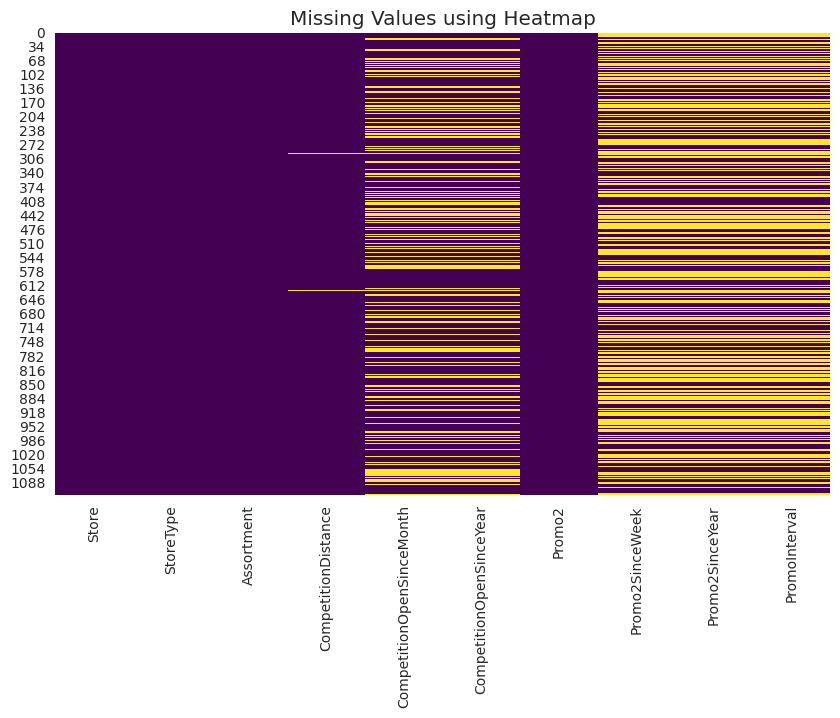

In [10]:
# Visualizing the missing values
# Heatmap for null values
plt.figure(figsize=(10, 6))
sns.heatmap(store_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values using Heatmap')
plt.show()

## Remove features(columns) with high percentages of missing values
We can observe that some features have a high percentage of missing values and they won't be accurate as indicators. Hence to ensure the accuracy of our analysis, we'll exclude features with more than 30% missing values from our dataset.

In [11]:
#Drop features
store_df = store_df.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek',
                     'Promo2SinceYear', 'PromoInterval'], axis=1)

## Replace missing values in features with low percentages of missing values

<ipython-input-12-1555432743>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(store_df.CompetitionDistance.dropna())


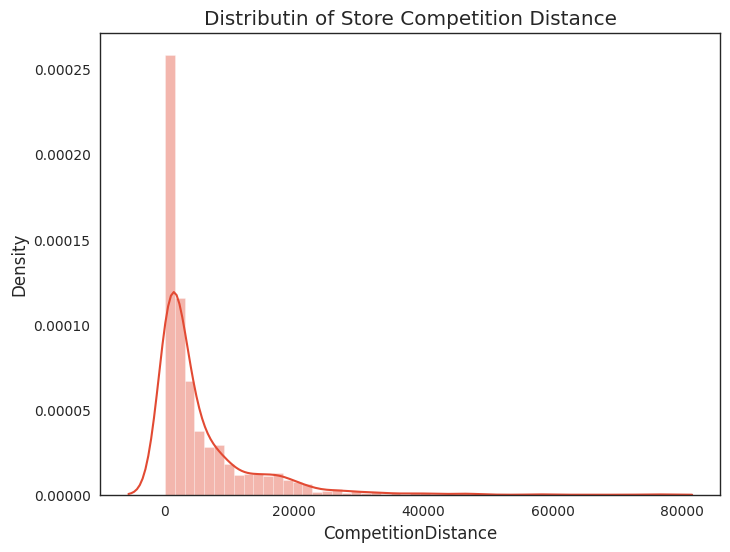

In [12]:
# CompetitionDistance is distance in meters to the nearest competitor store
# let's first have a look at its distribution

sns.distplot(store_df.CompetitionDistance.dropna())
plt.title("Distributin of Store Competition Distance")
plt.show()

### The distribution is right skewed, so we'll replace missing values with the median.

In [13]:
# replace missing values in CompetitionDistance with median for the store dataset

store_df.CompetitionDistance.fillna(store_df.CompetitionDistance.median(), inplace=True)

<ipython-input-13-2781003425>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store_df.CompetitionDistance.fillna(store_df.CompetitionDistance.median(), inplace=True)


### Understanding Your Variables

In [14]:
store_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'Promo2'], dtype='object')

In [15]:
store_df.describe()

,Store,CompetitionDistance,Promo2
count,1115.00000,1115.000000,1115.000000
mean,558.00000,5396.614350,0.512108
std,322.01708,7654.513635,0.500078
min,1.00000,20.000000,0.000000
25%,279.50000,720.000000,0.000000
50%,558.00000,2325.000000,1.000000
75%,836.50000,6875.000000,1.000000
max,1115.00000,75860.000000,1.000000


## **EDA for Store Data**

### Distribution Of Different Store Types

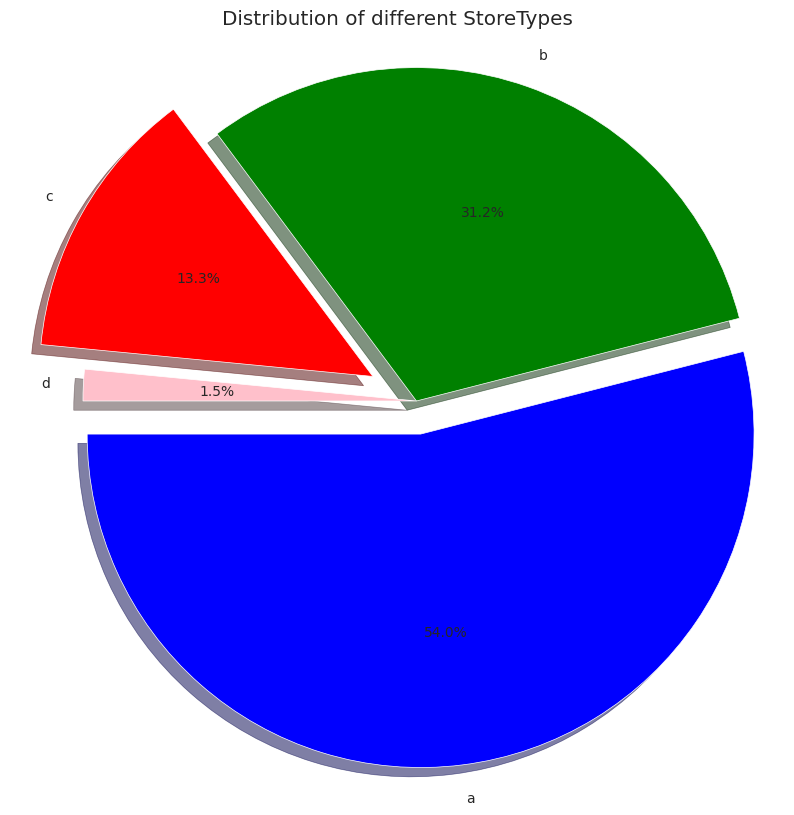

In [16]:
labels = 'a' , 'b' , 'c' , 'd'
sizes = store_df.StoreType.value_counts()
colors = ['blue', 'green' , 'red' , 'pink']
explode = (0.1, 0.0 , 0.15 , 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Distribution of different StoreTypes")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

### Pairplot for Store Dataset

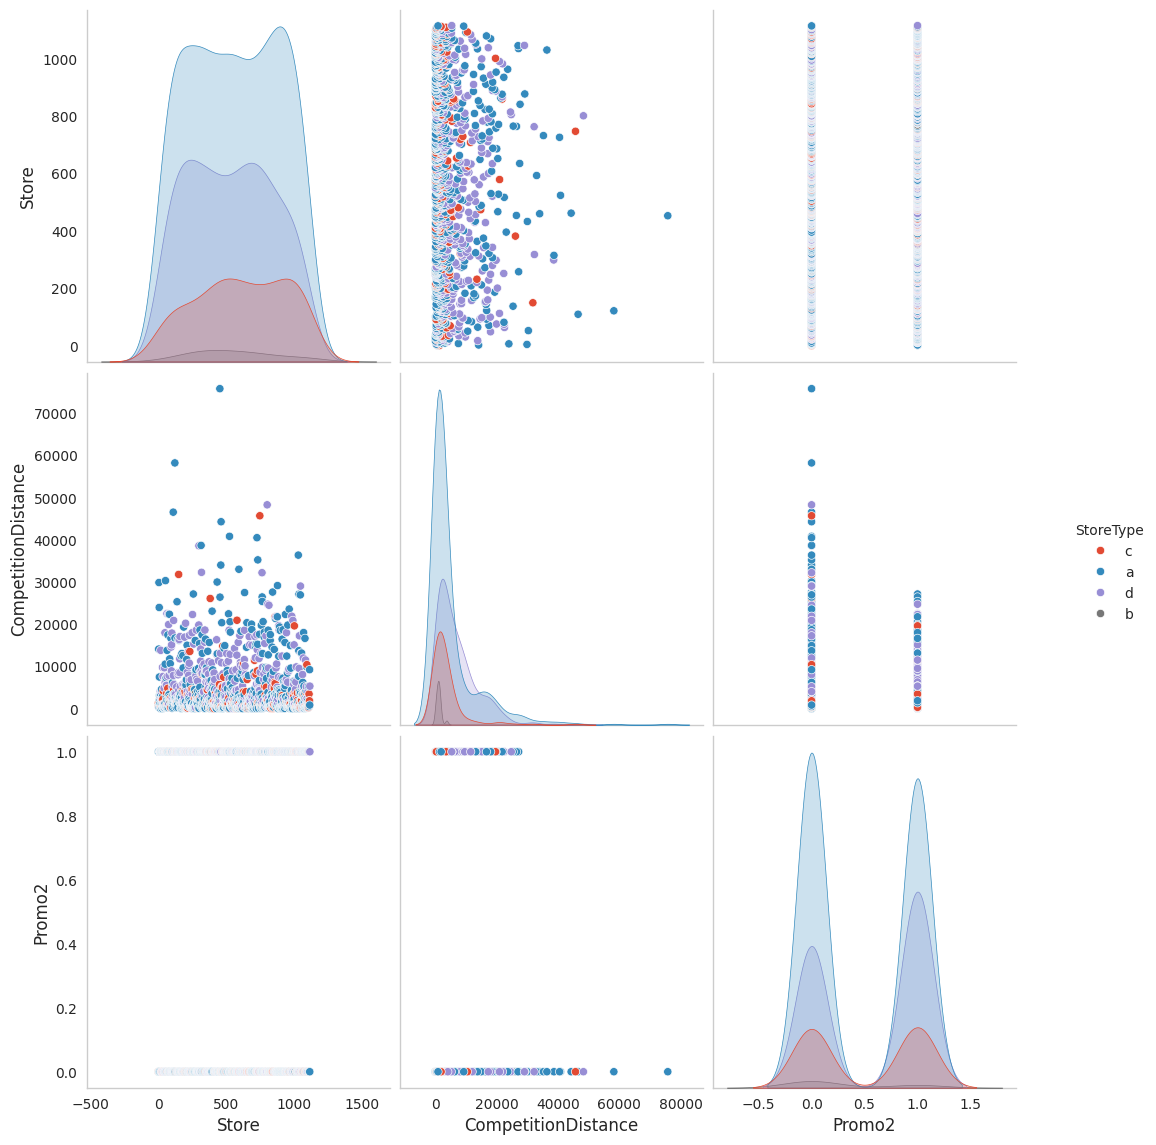

In [17]:
#Pairplot for store dataset
sns.set_style("whitegrid", {'axes.grid' : False})
pp=sns.pairplot(store_df,hue='StoreType')
pp.fig.set_size_inches(12,12);

### Checking stores with their assortment type

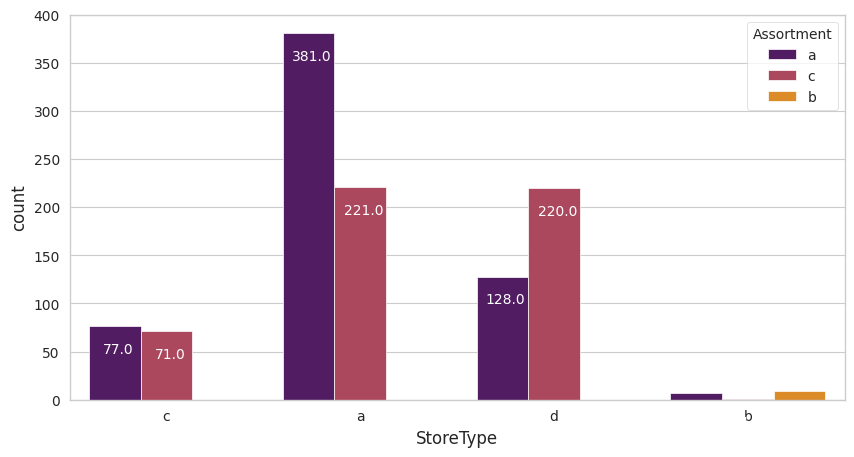

In [18]:
#checking stores with their assortment type
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
store_type=sns.countplot(x='StoreType',hue='Assortment', data=store_df,palette="inferno")

for p in store_type.patches:
    store_type.annotate(f'\n{p.get_height()}', (p.get_x()+0.15, p.get_height()),ha='center', va='top', color='white', size=10)


# **Analysing the Rossmann Dataset**

## Dataset First *View*

In [19]:
# Dataset First Look
rossman_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


## Dataset Rows & Columns count

In [20]:
rows, columns = rossman_df.shape
print(f"The Rossmann dataset has {rows} rows and {columns} columns.")

The Rossmann dataset has 1017209 rows and 9 columns.


## Dataset Information

In [21]:
# Dataset Info
rossman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


## Duplicate Values

In [22]:
# Dataset Duplicate Value Count
duplicate_count = rossman_df.duplicated().sum()
print(f'The Rossman dataset contains {duplicate_count} duplicate rows.')

The Rossman dataset contains 0 duplicate rows.


## Missing Values/Null Values

In [23]:
# Missing Values/Null Values Count
missing_values_count = rossman_df.isnull().sum()
print('Missing Values/Null Values Count:')
print(missing_values_count)

print('*'*50)
# Calculating the percentage of missing or null values in each column of the dataset
missing_data_percentage = (rossman_df.isnull().sum() / len(rossman_df)) * 100
print('Missing Data Percentage:')
print(missing_data_percentage)

Missing Values/Null Values Count:
Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64
**************************************************
Missing Data Percentage:
Store            0.0
DayOfWeek        0.0
Date             0.0
Sales            0.0
Customers        0.0
Open             0.0
Promo            0.0
StateHoliday     0.0
SchoolHoliday    0.0
dtype: float64


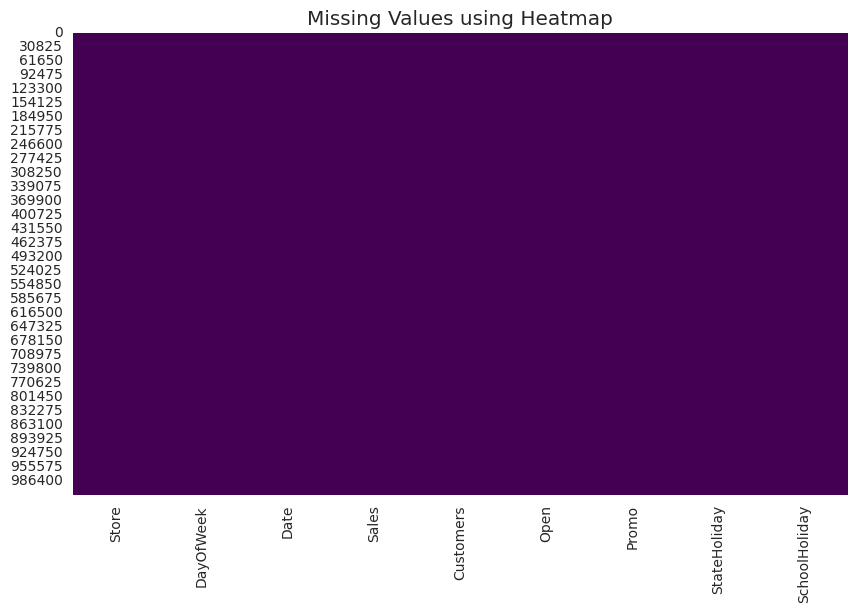

In [24]:
# Visualizing the missing values
# Heatmap for null values
plt.figure(figsize=(10, 6))
sns.heatmap(rossman_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values using Heatmap')
plt.show()

## Understanding Your Variables

In [25]:
# Dataset Columns
rossman_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [26]:
# Dataset Describe
rossman_df.describe(include='all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,2013-01-02,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,986159,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


In [27]:
# Dataset Describe
rossman_df.describe().T   # The describe() method to generate descriptive statistics for the DataFrame columns.
                         # The .T attribute transposes the result, swapping rows and columns

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0


## Check Unique Values for each variable.

In [28]:
# Check Unique Values for each variable.
# Iterating through each column in the DataFrame
for i in rossman_df.columns.tolist():
  print("Number of unique values in",i,"is",rossman_df[i].nunique())

Number of unique values in Store is 1115
Number of unique values in DayOfWeek is 7
Number of unique values in Date is 942
Number of unique values in Sales is 21734
Number of unique values in Customers is 4086
Number of unique values in Open is 2
Number of unique values in Promo is 2
Number of unique values in StateHoliday is 4
Number of unique values in SchoolHoliday is 2


In [29]:
# Value_counts of StateHoliday Column
rossman_df.StateHoliday.value_counts()

,count
StateHoliday,
0,986159
a,20260
b,6690
c,4100


In [30]:
print(rossman_df['Date'].min(),'initial')
print(rossman_df['Date'].max(),'final')

2013-01-01 initial
2015-07-31 final


This tells us we have a data of almost 3 years.

In [31]:
# extract year, month, day and week of year from "Date"

rossman_df['Date']=pd.to_datetime(rossman_df['Date'])
rossman_df['Year'] = rossman_df['Date'].apply(lambda x: x.year)
rossman_df['Month'] = rossman_df['Date'].apply(lambda x: x.month)
rossman_df['Day'] = rossman_df['Date'].apply(lambda x: x.day)
rossman_df['WeekOfYear'] = rossman_df['Date'].apply(lambda x: x.weekofyear)

In [32]:
rossman_df.sort_values(by=['Date','Store'],inplace=True,ascending=[False,True])
rossman_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,31


In [33]:
rossman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 13 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
 9   Year           1017209 non-null  int64         
 10  Month          1017209 non-null  int64         
 11  Day            1017209 non-null  int64         
 12  WeekOfYear     1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(11), object(1)
memory usage: 100.9+ MB


## **EDA On Rossman Dataset**

### Countplot

<Axes: xlabel='DayOfWeek', ylabel='count'>

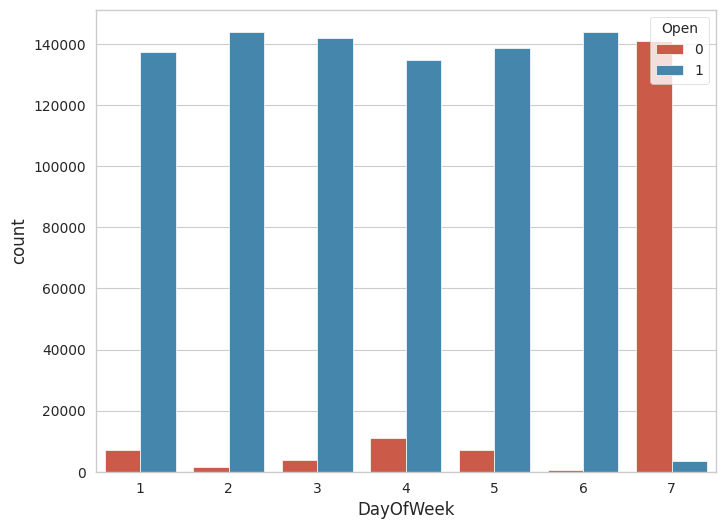

In [34]:
sns.countplot(x='DayOfWeek',hue='Open',data=rossman_df)


As we can observe that Stores mainly closed on Sunday

### Impact of Promo on Sales

<Axes: xlabel='Promo', ylabel='Sales'>

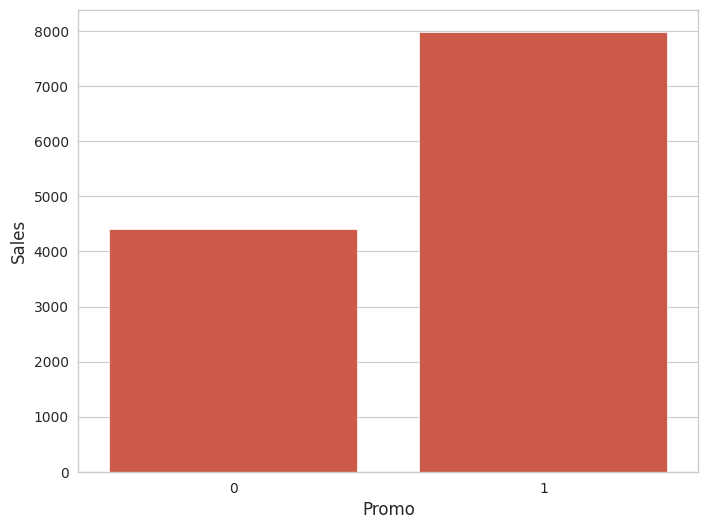

In [35]:
# Impact of promo on sales
Promo_sales = pd.DataFrame(rossman_df.groupby('Promo').agg({'Sales':'mean'}))
sns.barplot(x=Promo_sales.index, y = Promo_sales['Sales'])

Sales Are nearly doubled when Promo is running.

### Months Vs Sales

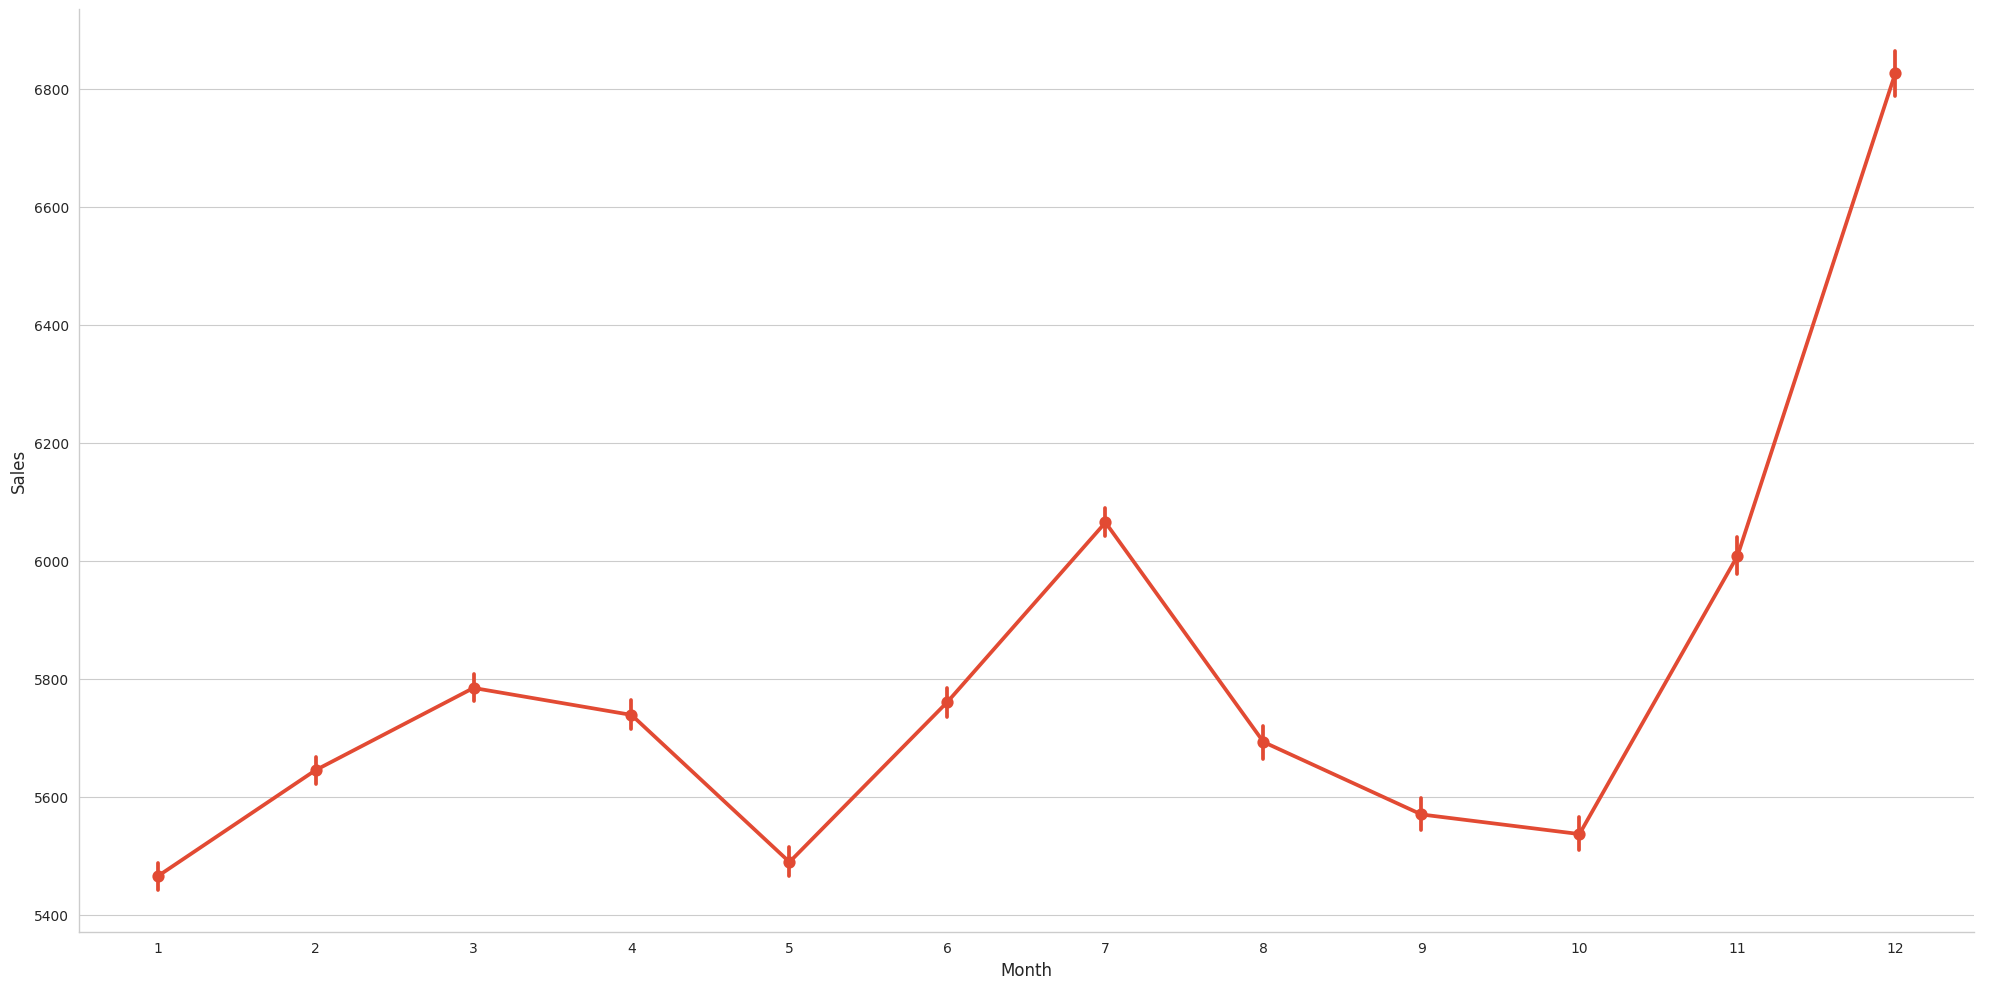

In [36]:
sns.catplot(x="Month" ,y = "Sales" , data=rossman_df, kind="point", aspect=2,height=10)

As We can obsreve that in the month of November and specially in December Sales is increasing rapidly every year on the christmas eve.

### Sales affected by Schoolholiday or Not

In [37]:
# Value Counts of SchoolHoliday Column
rossman_df.SchoolHoliday.value_counts()

,count
SchoolHoliday,
0,835488
1,181721


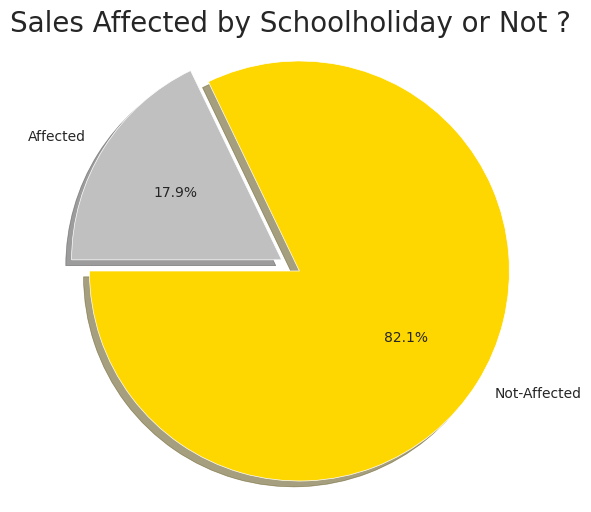

In [38]:
labels = 'Not-Affected' , 'Affected'
sizes = rossman_df.SchoolHoliday.value_counts()
colors = ['gold', 'silver']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by Schoolholiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

As we can see in the Piechart Sales affected by School Holiday is 18% and Mainly Sales aren't afffected by School Holiday.

### Transforming Variable StateHoliday

In [39]:
# First, ensure all values are of a comparable type (like string) for mapping
rossman_df["StateHoliday"] = rossman_df["StateHoliday"].astype(str)

# Now apply the mapping
rossman_df["StateHoliday"] = rossman_df["StateHoliday"].map({"0": 0, "a": 1, "b": 1, "c": 1})

# Convert the column to integer type if preferred
rossman_df["StateHoliday"] = rossman_df["StateHoliday"].astype(int)

# Value_counts of StateHoliday Column after mapping
sizes = rossman_df.StateHoliday.value_counts()
print("\nValue counts of StateHoliday after mapping:")
print(sizes)


Value counts of StateHoliday after mapping:
StateHoliday
0    986159
1     31050
Name: count, dtype: int64


#### Sales Affected by State holiday or Not

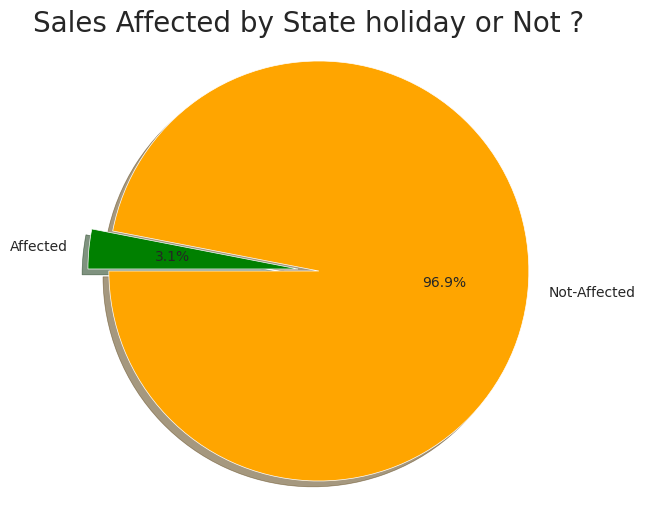

In [40]:
# Now, create labels that match the size of the value counts
# The index of the 'sizes' Series are the actual values after mapping (0 and possibly 1)
# We need to map these values to the desired labels 'Not-Affected' and 'Affected'.
# Assuming 0 maps to 'Not-Affected' and 1 maps to 'Affected'.
labels = 'Not-Affected' , 'Affected'
sizes = rossman_df.StateHoliday.value_counts()
colors = ['orange','green']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by State holiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

As we can see in the Piechart Sales affected by State Holiday is only 3% means Sales aren't afffected by State Holiday

In [41]:
rossman_df.drop('StateHoliday',inplace=True,axis=1)

### Distribution of sales

<Axes: xlabel='Sales', ylabel='Count'>

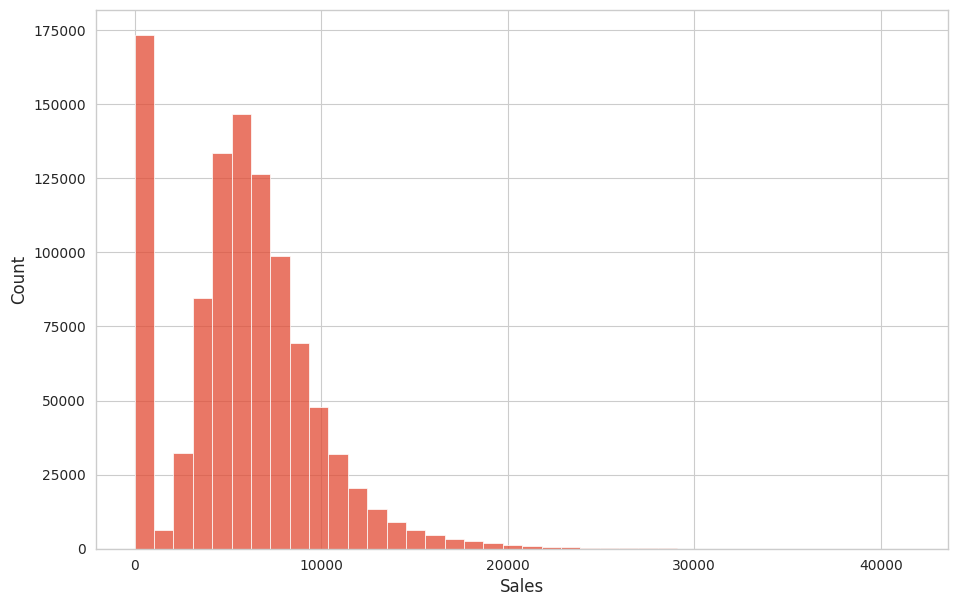

In [42]:
#distribution of sales
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.histplot(rossman_df['Sales'], kde = False,bins=40)

Histogram Representation of Sales. Here 0 is showing because most of the time store was closed.

### Sales Vs Customers

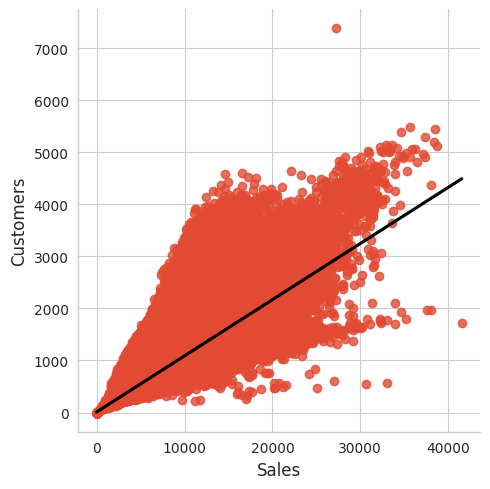

In [43]:

#linear relation between sales and customers
sns.lmplot(x= 'Sales' , y ='Customers',data=rossman_df, palette='seismic', height=5,aspect=1, line_kws={'color':'black'});


### Heatmap of the Rossman Dataset

<Axes: >

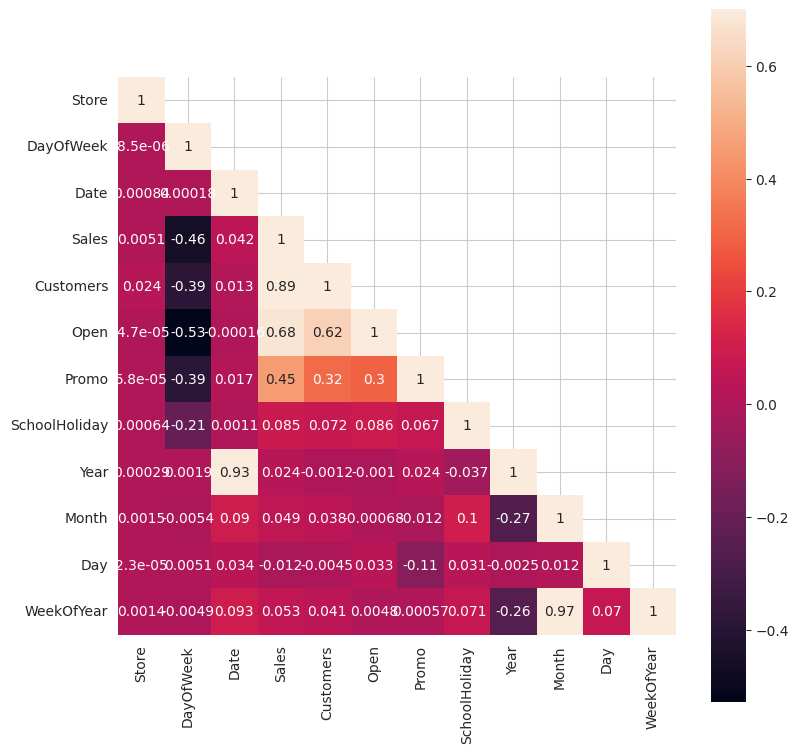

In [44]:
correlation_map = rossman_df[rossman_df.columns].corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig,ax= plt.subplots()
fig.set_size_inches(9,9)
sns.heatmap(correlation_map, mask=obj,vmax=.7, square=True,annot=True)

As we can see that in the graph given below that Stores mainly closed on Sunday

## We can see that there is not such significant differences in these 3 years in terms of sales.

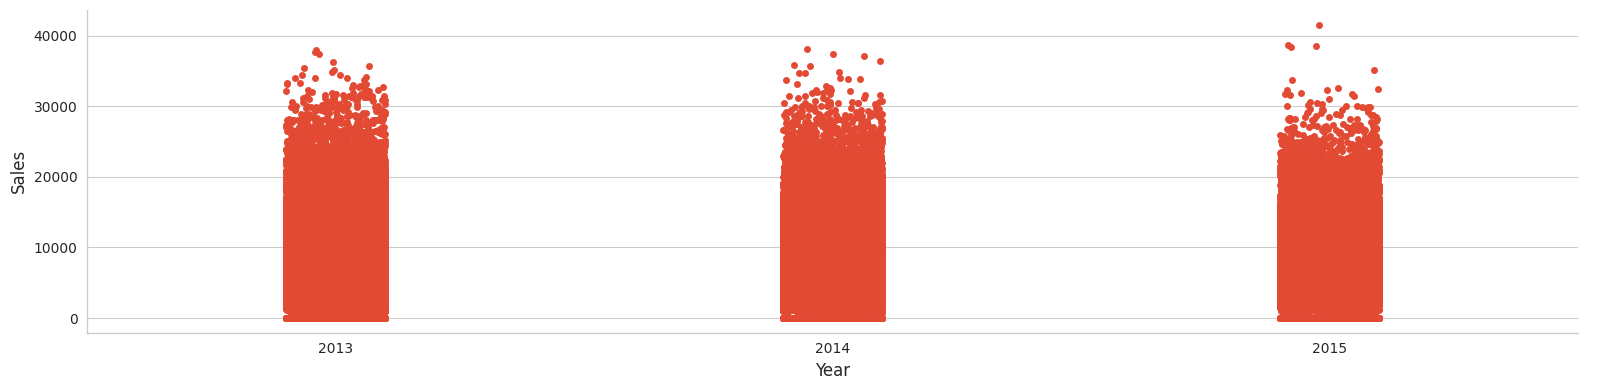

In [45]:
#plotting year vs sales
sns.catplot(x='Year',y='Sales',data=rossman_df, height=4, aspect=4 )

# **Merging the Two Datasets**

In [46]:
df = pd.merge(rossman_df, store_df, on='Store', how='left')
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,2015-07-31,5263,555,1,1,1,2015,7,31,31,c,a,1270.0,0
1,2,5,2015-07-31,6064,625,1,1,1,2015,7,31,31,a,a,570.0,1
2,3,5,2015-07-31,8314,821,1,1,1,2015,7,31,31,a,a,14130.0,1
3,4,5,2015-07-31,13995,1498,1,1,1,2015,7,31,31,c,c,620.0,0
4,5,5,2015-07-31,4822,559,1,1,1,2015,7,31,31,a,a,29910.0,0


In [47]:
df.shape

(1017209, 16)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 16 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Store                1017209 non-null  int64         
 1   DayOfWeek            1017209 non-null  int64         
 2   Date                 1017209 non-null  datetime64[ns]
 3   Sales                1017209 non-null  int64         
 4   Customers            1017209 non-null  int64         
 5   Open                 1017209 non-null  int64         
 6   Promo                1017209 non-null  int64         
 7   SchoolHoliday        1017209 non-null  int64         
 8   Year                 1017209 non-null  int64         
 9   Month                1017209 non-null  int64         
 10  Day                  1017209 non-null  int64         
 11  WeekOfYear           1017209 non-null  int64         
 12  StoreType            1017209 non-null  object        
 1

## **EDA On Merged Dataset**

### Heatmap Of Merged Dataset

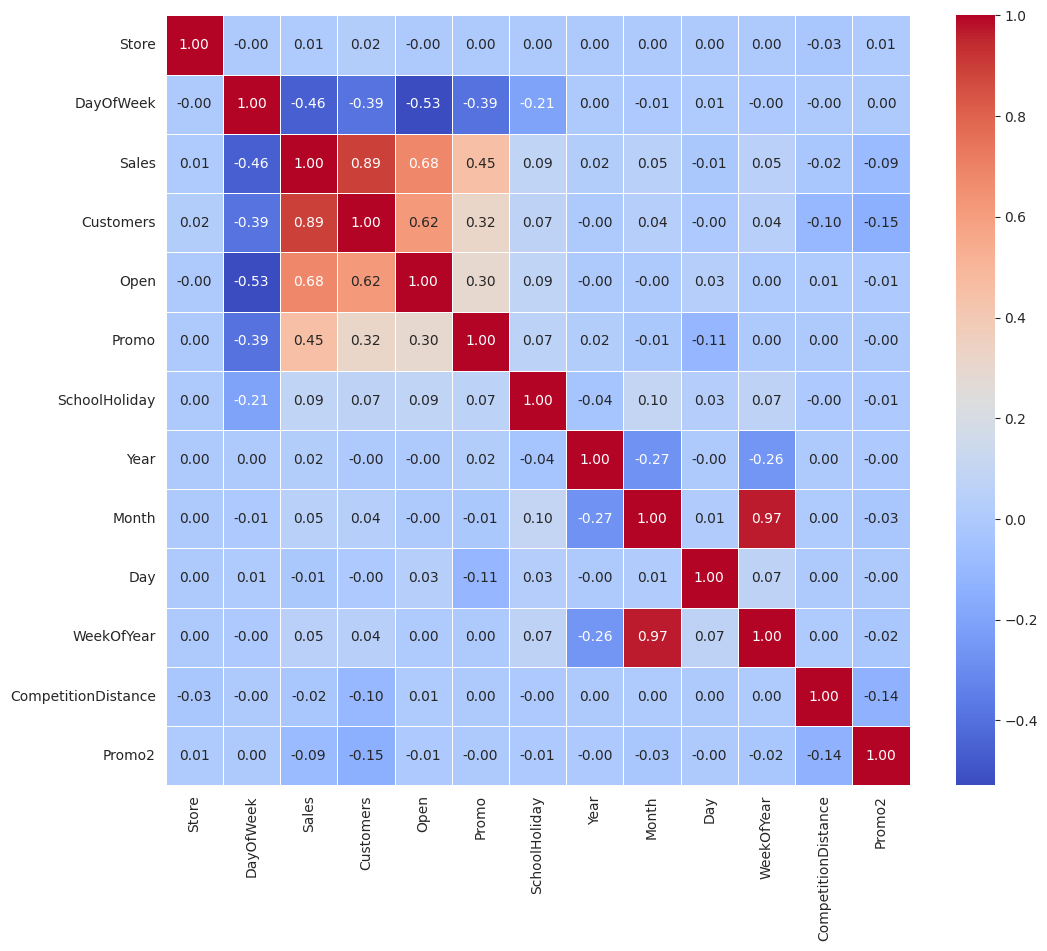

In [49]:
# Selecting only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
corr_matrix = numeric_cols.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Rotate the y-axis labels for better readability
plt.yticks(rotation=0)

# Show plot
plt.show()

### Store Type vs Other Features

In [50]:
df['Avg_Customer_Sales'] = df.Sales / df.Customers

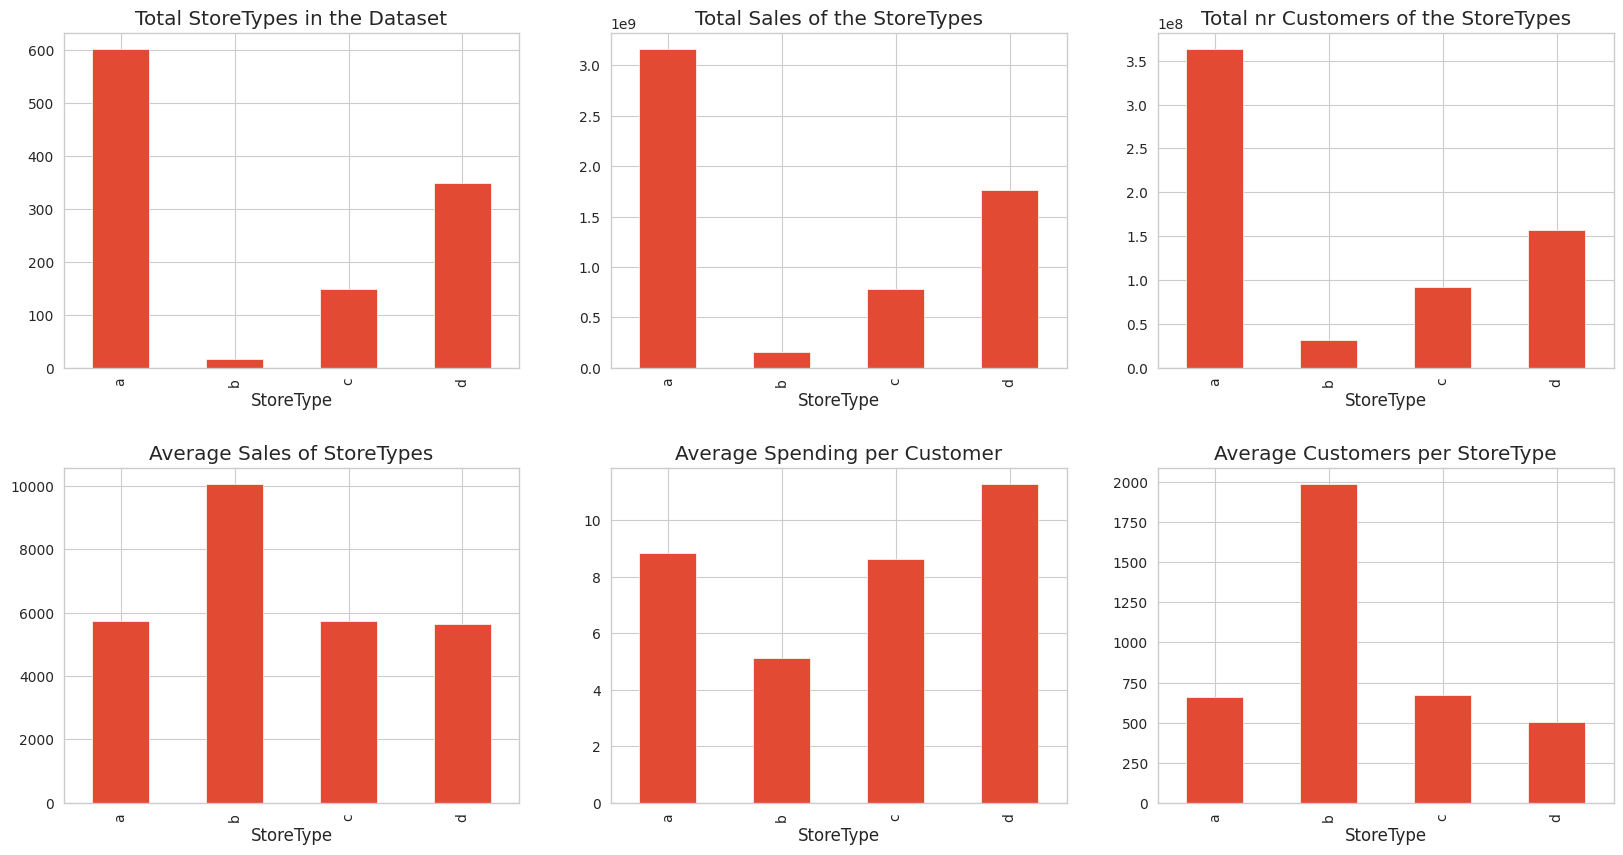

In [51]:
f, ax = plt.subplots(2, 3, figsize = (20,10))

store_df.groupby("StoreType")["Store"].count().plot(kind = "bar", ax = ax[0, 0], title = "Total StoreTypes in the Dataset")

df.groupby("StoreType")["Sales"].sum().plot(kind = "bar", ax = ax[0,1], title = "Total Sales of the StoreTypes")

df.groupby("StoreType")["Customers"].sum().plot(kind = "bar", ax = ax[0,2], title = "Total nr Customers of the StoreTypes")

df.groupby("StoreType")["Sales"].mean().plot(kind = "bar", ax = ax[1,0], title = "Average Sales of StoreTypes")

df.groupby("StoreType")["Avg_Customer_Sales"].mean().plot(kind = "bar", ax = ax[1,1], title = "Average Spending per Customer")

df.groupby("StoreType")["Customers"].mean().plot(kind = "bar", ax = ax[1,2], title = "Average Customers per StoreType")

plt.subplots_adjust(hspace = 0.3)
plt.show()

Here we can observe from the graphs, the StoreType A has the most stores, sales and customers. However the StoreType D has the best averages spendings per customers. StoreType B, with only 17 stores has the most average customers

### Let's go ahead with the promotions

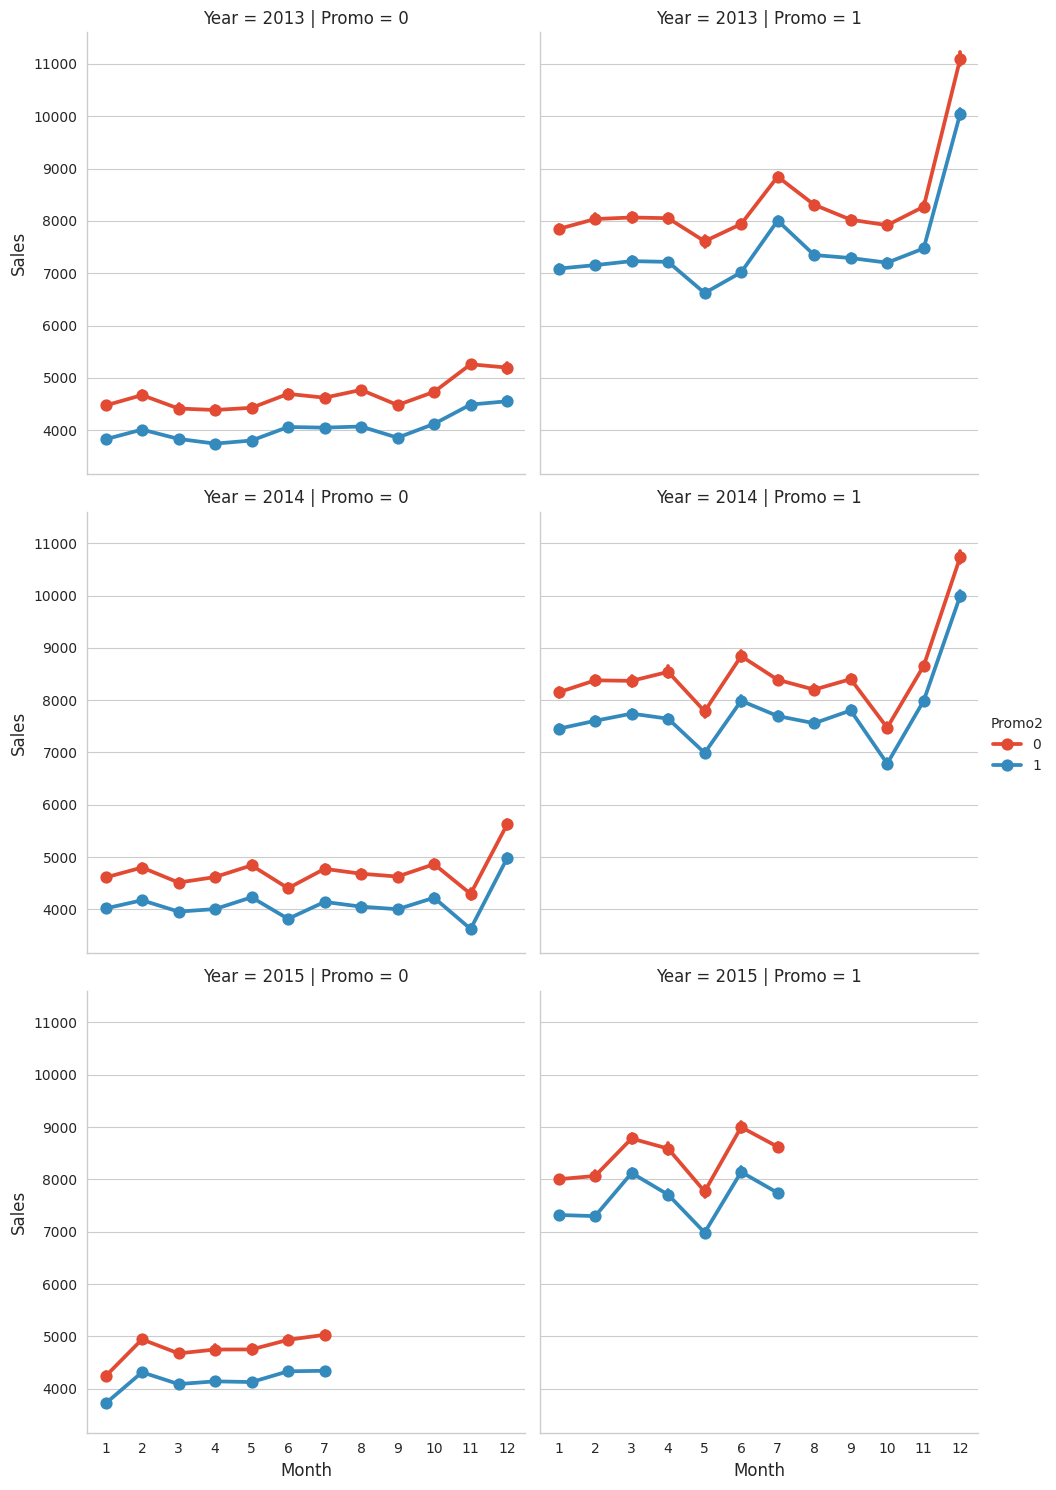

In [52]:
sns.catplot(data=df, x="Month", y="Sales", col='Promo', hue='Promo2', row="Year", kind='point')

It can be observed, if the stores are having promotion the sales are higher. Overall the store promotions sellings are also higher than the seasionality promotions (Promo2). However I can't see no yearly trend.

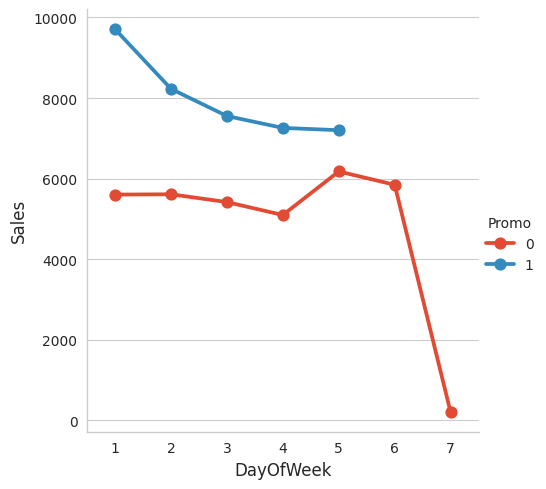

In [53]:
sns.catplot(data=df, x="DayOfWeek", y="Sales", hue="Promo", kind="point")

As We can see that when the promo is running Sales are high

In [54]:
print("""So, it seems there's no promotion during the weekend. Nevertheless, when stores run promotions, sales skyrocket.
Sunday appears to be the star performer in terms of sales. It's not surprising why.
""")
print("There are", df[(df.Open == 1) & (df.DayOfWeek == 7)].Store.unique().shape[0], "stores open on Sundays.")


So, it seems there's no promotion during the weekend. Nevertheless, when stores run promotions, sales skyrocket.
Sunday appears to be the star performer in terms of sales. It's not surprising why.

There are 33 stores open on Sundays.


### The trends on a yearly basis.

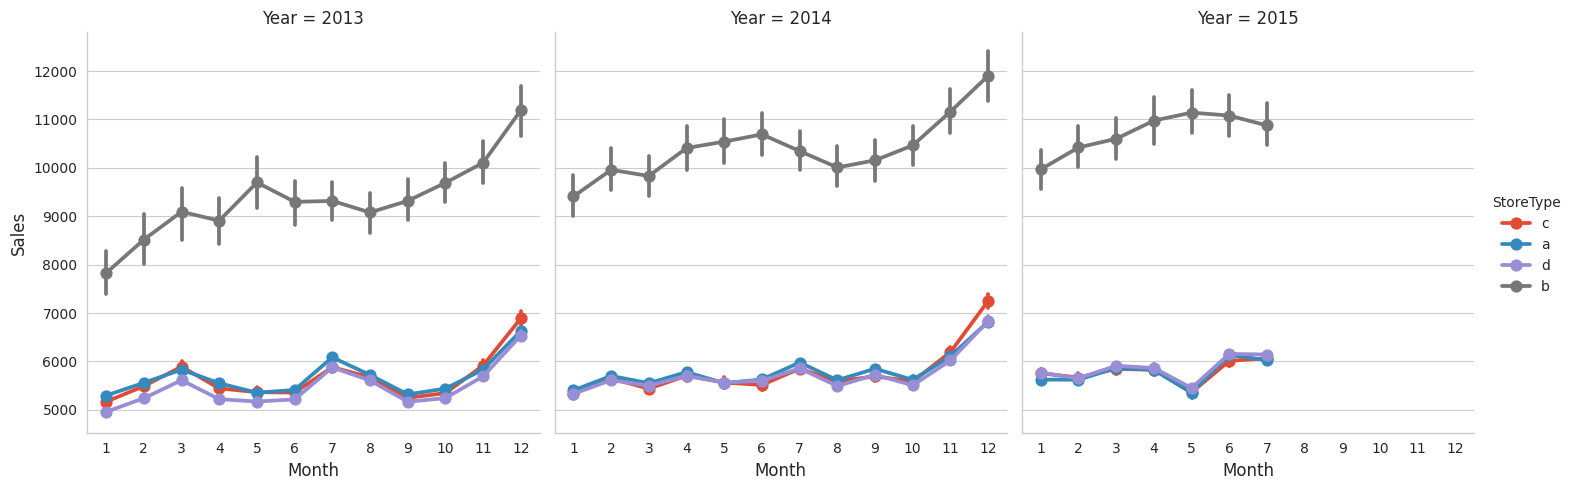

In [55]:
sns.catplot(data=df, x="Month", y="Sales", col="Year", hue="StoreType", kind="point")

We can see a seasonalities, but not trends. The sales stays constantly yearly.

### Impact of the Competition Distance on the sales.

In [56]:
df.CompetitionDistance.describe()
# The obsverations are continous numbers, so we need to convert them into a categories. Lets a create a new variable.
df["CompetitionDistance_Cat"] = pd.cut(df["CompetitionDistance"], 5)

<ipython-input-57-4235633637>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(by = "CompetitionDistance_Cat").Sales.mean().plot(kind = "bar", title = "Average Total Sales by Competition Distance", ax = ax[0])
<ipython-input-57-4235633637>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(by = "CompetitionDistance_Cat").Customers.mean().plot(kind = "bar", title = "Average Total Customers by Competition Distance", ax = ax[1])


<Axes: title={'center': 'Average Total Customers by Competition Distance'}, xlabel='CompetitionDistance_Cat'>

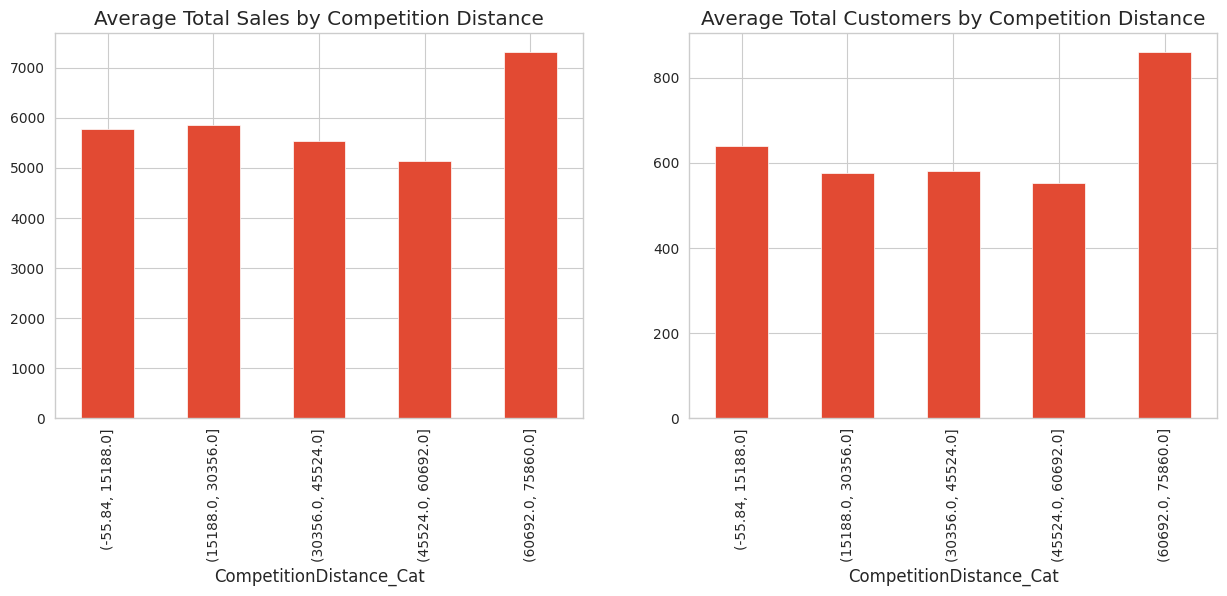

In [57]:
f, ax = plt.subplots(1,2, figsize = (15,5))

df.groupby(by = "CompetitionDistance_Cat").Sales.mean().plot(kind = "bar", title = "Average Total Sales by Competition Distance", ax = ax[0])
df.groupby(by = "CompetitionDistance_Cat").Customers.mean().plot(kind = "bar", title = "Average Total Customers by Competition Distance", ax = ax[1])


It is pretty clear. If the competions is very far away, the stores are performing better (sales and customers)

In [58]:
df.drop(['Avg_Customer_Sales','CompetitionDistance_Cat'],axis=1,inplace=True)

## outliers

<Axes: ylabel='Sales'>

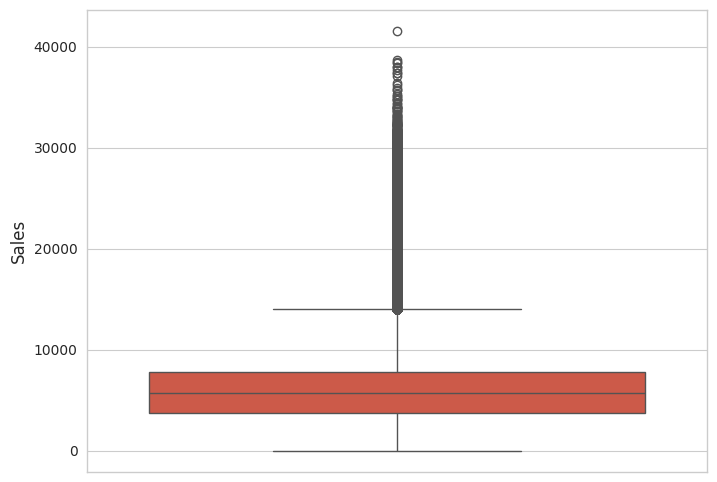

In [59]:
#checking outliers in sales
sns.boxplot(rossman_df['Sales'])

Box plot shows that we have a very high outliers in sales

#### Removing Outliers Of Sales Column

In [60]:
#removing outliers
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [61]:
# defining new variable after removing outliers
df= remove_outlier(df, 'Sales')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 990515 entries, 0 to 1017208
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Store                990515 non-null  int64         
 1   DayOfWeek            990515 non-null  int64         
 2   Date                 990515 non-null  datetime64[ns]
 3   Sales                990515 non-null  int64         
 4   Customers            990515 non-null  int64         
 5   Open                 990515 non-null  int64         
 6   Promo                990515 non-null  int64         
 7   SchoolHoliday        990515 non-null  int64         
 8   Year                 990515 non-null  int64         
 9   Month                990515 non-null  int64         
 10  Day                  990515 non-null  int64         
 11  WeekOfYear           990515 non-null  int64         
 12  StoreType            990515 non-null  object        
 13  Assortment        

# **Conclusion of the EDA:**
**1. Sales are highly correlated with the number of Customers.**

This suggests that higher foot traffic tends to result in increased sales, indicating a strong relationship between these two variables.

**2. The most selling and crowded store type is A.**

Store Type A appears to be the most popular and busiest, likely attracting a larger number of customers and generating higher sales.

**3. Store Type B has the lowest Average Sales per Customer.**

This indicates that customers visiting Store Type B tend to spend less on average per visit. It suggests that Store Type B may cater to customers who make smaller purchases or visit for specific items.

**4. Store Type D had the highest buyer cart.**

Store Type D seems to have the highest average purchase size per customer visit, indicating that customers at this type of store tend to buy more items per transaction.

**5. Promo runs only on weekdays.**

Promotions are observed to be active only during weekdays, implying that promotional activities are targeted towards increasing sales during the regular business week.

**6. Promotion leads to an increase in both Sales and Customers for all stores.**

The presence of promotions results in higher sales and attracts more customers across all store types, indicating the effectiveness of promotions in driving traffic and sales.

**7. More stores are opened during School holidays than State holidays.**

There's a higher proportion of stores open during school holidays compared to state holidays, suggesting that retailers anticipate increased demand during school breaks.

**8. Stores opened during School Holidays experience higher sales than on normal days.**

This implies that school holidays coincide with increased consumer spending, leading to higher sales for stores that remain open during these periods.

**9. Sales increase during Christmas week, potentially due to higher demand for beauty products.**

The spike in sales during the Christmas week could be attributed to heightened consumer spending during the festive season, with a potential focus on beauty products as part of holiday preparations and gifting.

**10. Promo2 doesn't seem to be correlated with any significant change in sales amount.**

Promo2, another promotional scheme, does not appear to have a discernible impact on sales, suggesting that it may not be as effective as other promotional strategies.

**11. Absence of values in features CompetitionOpenSinceYear/Month doesn’t indicate the absence of competition.**

The absence of values in the features indicating the opening year and month of competitors does not necessarily mean there's no competition, as indicated by non-null values in CompetitionDistance. This suggests that while competition distance data is available, information about competitor opening dates might be incomplete or unavailable.

# **Drop Subsets Of Data Where Might Cause Bias**

In [63]:
# where stores are closed, they won't generate sales, so we will remove that part of the dataset
df = df[df.Open != 0]

In [64]:
# Open isn't a variable anymore, so we'll drop it too
df = df.drop('Open', axis=1)

In [65]:
# Check if there's any opened store with zero sales
df[df.Sales == 0]['Store'].sum()

np.int64(31460)

In [66]:
# see the percentage of open stored with zero sales
df[df.Sales == 0]['Sales'].sum()/df.Sales.sum()

np.float64(0.0)

In [67]:
# remove this part of data to avoid bias
df = df[df.Sales != 0]

In [68]:
df_new=df.copy()  #to keep original data safe
# Print columns of df_new to debug
print(df_new.columns)
df_new = pd.get_dummies(df_new,columns=['StoreType','Assortment'])

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Promo',
       'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear', 'StoreType',
       'Assortment', 'CompetitionDistance', 'Promo2'],
      dtype='object')


In [69]:
df_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear,CompetitionDistance,Promo2,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,5,2015-07-31,5263,555,1,1,2015,7,31,31,1270.0,0,False,False,True,False,True,False,False
1,2,5,2015-07-31,6064,625,1,1,2015,7,31,31,570.0,1,True,False,False,False,True,False,False
2,3,5,2015-07-31,8314,821,1,1,2015,7,31,31,14130.0,1,True,False,False,False,True,False,False
3,4,5,2015-07-31,13995,1498,1,1,2015,7,31,31,620.0,0,False,False,True,False,False,False,True
4,5,5,2015-07-31,4822,559,1,1,2015,7,31,31,29910.0,0,True,False,False,False,True,False,False


## Sales in terms of days of the week

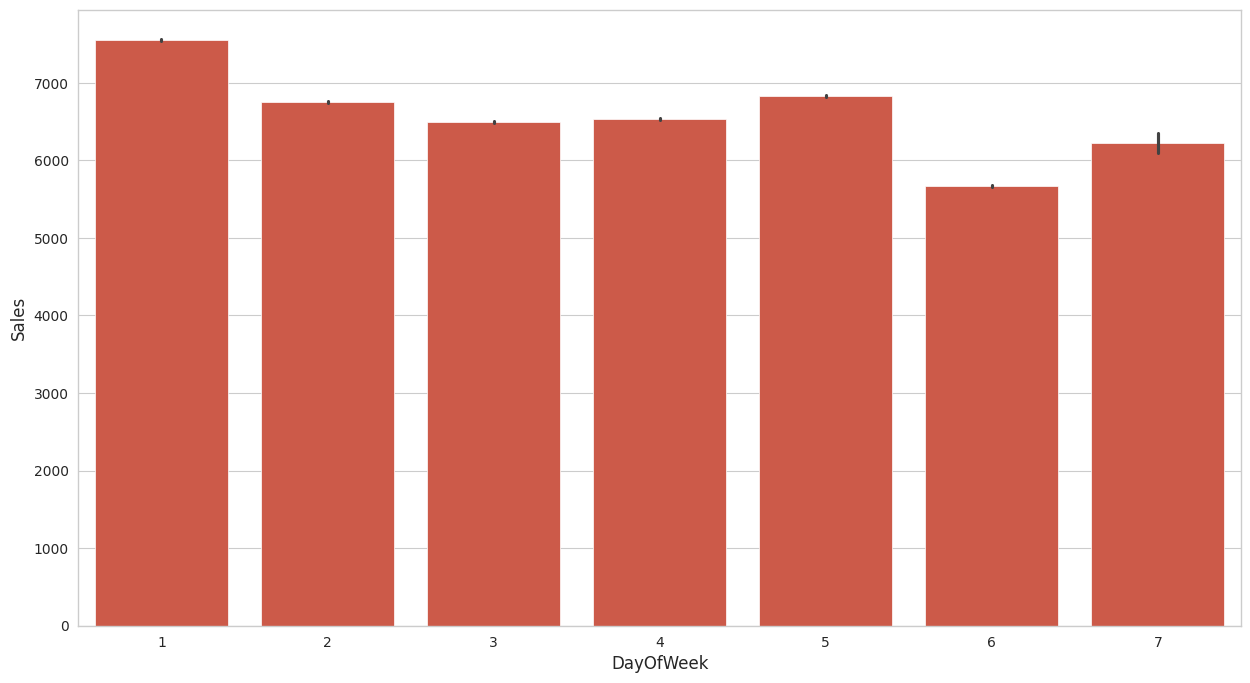

In [70]:
#plot for sales in terms of days of the week
plt.figure(figsize=(15,8))
sns.barplot(x='DayOfWeek', y='Sales' ,data=df_new);

## Setting Features and Target Variables

In [71]:
X = df_new.drop(['Sales','Store','Date','Year'] , axis = 1)
y = df_new.Sales

In [72]:
X.shape

(817644, 16)

In [73]:
X.head()

,DayOfWeek,Customers,Promo,SchoolHoliday,Month,Day,WeekOfYear,CompetitionDistance,Promo2,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,5,555,1,1,7,31,31,1270.0,0,False,False,True,False,True,False,False
1,5,625,1,1,7,31,31,570.0,1,True,False,False,False,True,False,False
2,5,821,1,1,7,31,31,14130.0,1,True,False,False,False,True,False,False
3,5,1498,1,1,7,31,31,620.0,0,False,False,True,False,False,False,True
4,5,559,1,1,7,31,31,29910.0,0,True,False,False,False,True,False,False


In [74]:
y.head()

,Sales
0,5263
1,6064
2,8314
3,13995
4,4822


In [75]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817644 entries, 0 to 1017190
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   DayOfWeek            817644 non-null  int64  
 1   Customers            817644 non-null  int64  
 2   Promo                817644 non-null  int64  
 3   SchoolHoliday        817644 non-null  int64  
 4   Month                817644 non-null  int64  
 5   Day                  817644 non-null  int64  
 6   WeekOfYear           817644 non-null  int64  
 7   CompetitionDistance  817644 non-null  float64
 8   Promo2               817644 non-null  int64  
 9   StoreType_a          817644 non-null  bool   
 10  StoreType_b          817644 non-null  bool   
 11  StoreType_c          817644 non-null  bool   
 12  StoreType_d          817644 non-null  bool   
 13  Assortment_a         817644 non-null  bool   
 14  Assortment_b         817644 non-null  bool   
 15  Assortment_c         

In [76]:
y.info()

<class 'pandas.core.series.Series'>
Index: 817644 entries, 0 to 1017190
Series name: Sales
Non-Null Count   Dtype
--------------   -----
817644 non-null  int64
dtypes: int64(1)
memory usage: 12.5 MB


# **Splitting Dataset Into Training Set and Test Set**

In [77]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [78]:
columns = X_train.columns

## **1. Linear Regression (OLS)**

In [79]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [80]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [81]:
regressor.intercept_

np.float64(-1507.441798569973)

In [82]:
regressor.coef_

array([-1.30381346e+02,  3.06863041e+04,  1.09386001e+03,  2.29418388e+01,
        3.54223020e+02,  3.82831239e+01, -1.58021936e+02,  1.82430640e+03,
        3.10732033e+02,  3.18132398e+02, -1.90167603e+03,  1.67419398e+02,
        1.41612423e+03,  1.44688318e+03, -3.17950648e+03,  1.73262330e+03])

In [83]:
y_pred_train = regressor.predict(X_train)

In [84]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [85]:
mean_squared_error(y_test, y_pred)

1329406.2402058854

In [86]:
# Test performance
math.sqrt(mean_squared_error(y_test, y_pred))

1152.998803210951

In [87]:
train_score_1=regressor.score(X_train,y_train)
train_score_1

0.7807496727472854

In [88]:
test_score_1=regressor.score(X_test,y_test)
test_score_1

0.7823919595957616

In [89]:
#storing 100 observations for analysis
simple_lr_pred = y_pred[:100]
simple_lr_real = y_test[:100]
dataset_lr = pd.DataFrame({'Real':simple_lr_real,'PredictedLR':simple_lr_pred}) #storing these values into dataframe


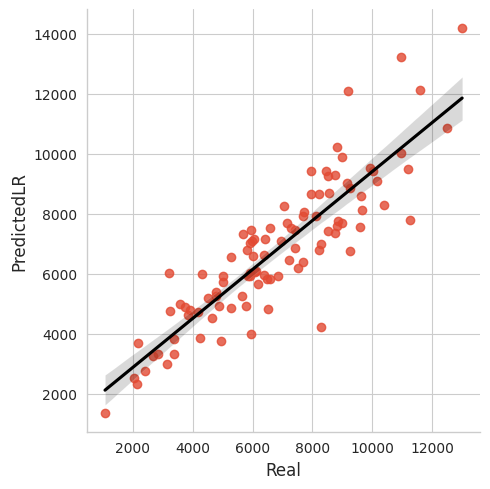

In [90]:
#visualising our predictions
sns.lmplot(x='Real', y='PredictedLR', data=dataset_lr, line_kws={'color': 'black'});

### **Inferences On Linear Regression Coefficients**

In [91]:
import numpy as np
import statsmodels.api as sm

# Convert data to numpy arrays
X = np.asarray(X)
y = np.asarray(y)

# Add intercept to the input data
X = sm.add_constant(X)

# Convert data to float type to ensure compatibility with np.isfinite()
X = X.astype(float)
y = y.astype(float)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()  ## sm.OLS(output, input)

# Make predictions
predictions = model.predict(X)

# Print out the statistics summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                 2.086e+05
Date:                Sat, 14 Jun 2025   Prob (F-statistic):               0.00
Time:                        07:51:19   Log-Likelihood:            -6.9257e+06
No. Observations:              817644   AIC:                         1.385e+07
Df Residuals:                  817629   BIC:                         1.385e+07
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -993.1075      5.669   -175.169      0.0

## **2. LARS (Least Angle Regression) Lasso Regression**

In [92]:
from sklearn.linear_model import LassoLars

# Initialize the LassoLars model with specified parameters, removing the 'normalize' argument
las = LassoLars(alpha=0.3, fit_intercept=False)

# Fit the model to the training data
lasreg = las.fit(X_train, y_train)

# The rest of your code for evaluating the LassoLars model can follow here
def rmse(x, y):
    return sqrt(mean_squared_error(x, y))

# definte MAPE function
def mape(x, y):
    return np.mean(np.abs((x - y) / x)) * 100

train_score_2=lasreg.score(X_train, y_train)
test_score_2=lasreg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_2 , "," ,
      "Out of Sample Test Score" ,":" , test_score_2)

y_predicted = lasreg.predict(X_train)
y_test_predicted = lasreg.predict(X_test)

print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.7807308911324253 , Out of Sample Test Score : 0.7823685232825739
Training RMSE : 1155.07694652747 Testing RMSE : 1153.0608903320883
Training MAPE : 14.215633319957135 Testing MAPE : 14.233294529232596


## **3. Decision Tree Regression**

In [93]:
tree = DecisionTreeRegressor()
treereg = tree.fit(X_train, y_train)

train_score_3=treereg.score(X_train, y_train)
test_score_3=treereg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_3 , "," ,
      "Test Score" ,":" , test_score_3)

y_predicted = treereg.predict(X_train)
y_test_predicted = treereg.predict(X_test)
print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.9999957301266714 , Test Score : 0.9158871444879209
Training RMSE : 5.097176662035323 Testing RMSE : 716.8405690547644
Training MAPE : 0.0010365300881590655 Testing MAPE : 7.639848223380766


### **Decision Tree With Hyper Parameter Tuning**

In [94]:
# another script that takes toooo long, to find the right parameters for tree
tree = DecisionTreeRegressor()

params = {
          'min_samples_split':[2,3,5,7],
          'min_samples_leaf':[6,8,10],
          }

# Changed the estimator from rfr to tree
grid = RandomizedSearchCV(estimator=tree,param_distributions=params,verbose=True,cv=10)
#choosing 10 K-Folds makes sure i went through all of the data and didn't miss any pattern.

grid.fit(X_train, y_train)
grid.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


{'min_samples_split': 7, 'min_samples_leaf': 8}

I trained Model with hyper parameters..to not run everytime i record the result

Here are our best parameters for Decision Tree

{ min_samples_split=5,min_samples_leaf=8 }

In [95]:
tree = DecisionTreeRegressor(min_samples_leaf=8,min_samples_split=5)
treereg = tree.fit(X_train, y_train)

train_score_4=treereg.score(X_train, y_train)
test_score_4=treereg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_4 , "," ,
      "Test Score" ,":" , test_score_4)

y_predicted = treereg.predict(X_train)
y_test_predicted = treereg.predict(X_test)
print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.9635058030756848 , Test Score : 0.9354231210510332
Training RMSE : 471.2312637547919 Testing RMSE : 628.1016194605214
Training MAPE : 5.025362123751686 Testing MAPE : 6.691502722956686


In [96]:
#storing 100 observations for analysis
dc_pred = y_test_predicted[:100]
dc_real = y_test[:100]
dataset_dc = pd.DataFrame({'Real':dc_real,'PredictedDC':dc_pred}) #storing these values into dataframe

In [97]:
#storing absolute diffrences between actual sales price and predicted
dataset_dc['diff']=(dataset_dc['Real']-dataset_dc['PredictedDC']).abs()

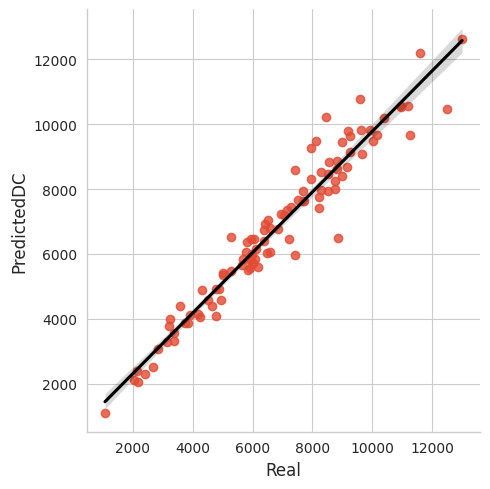

In [98]:
#visualising our predictions
sns.lmplot(x='Real', y='PredictedDC', data=dataset_dc, line_kws={'color': 'black'});

# **Conclusion**

In [99]:
score_df = pd.DataFrame({'Train_Score':[train_score_1,train_score_2,train_score_3],'Test_Score':[test_score_1,test_score_2,test_score_3]},index=['Linear Regression','Lasso Regression','Decision Tree'])


In [100]:
score_df

,Train_Score,Test_Score
Linear Regression,0.780750,0.782392
Lasso Regression,0.780731,0.782369
Decision Tree,0.999996,0.915887


In light of the evaluation results, it's evident that all three machine learning models, Linear Regression, Lasso Regression, and Decision Tree, exhibit varying levels of performance in predicting the target outcome.

Both Linear Regression and Lasso Regression models demonstrate similar predictive capabilities, with R-squared scores around 0.78 and Mean Squared Error values close to 0.78 as well. This suggests that they offer reasonable predictive accuracy and can effectively capture the relationships between the independent and dependent variables in the dataset.

On the other hand, the Decision Tree model stands out with remarkable performance, achieving an exceptionally high R-squared score of nearly 1 (0.999996) and a relatively low Mean Squared Error of 0.9158. These results indicate that the Decision Tree model almost perfectly predicts the target outcome and exhibits minimal prediction errors.

However, it's crucial to consider the potential drawbacks of the Decision Tree model, such as its susceptibility to overfitting, particularly in complex datasets. Despite its outstanding performance in this evaluation, further scrutiny is necessary to ascertain its generalization ability and suitability for real-world applications.

In conclusion, while all three models showcase distinct strengths and weaknesses, the Decision Tree model emerges as the top performer in terms of predictive accuracy for the given dataset. Nonetheless, careful consideration of the specific requirements and characteristics of the application domain is essential in selecting the most appropriate model for deployment.